# Project 4: Hacking Nutrition (Team Holbrook)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-4:-Hacking-Nutrition-(Team-Holbrook)" data-toc-modified-id="Project-4:-Hacking-Nutrition-(Team-Holbrook)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project 4: Hacking Nutrition (Team Holbrook)</a></span><ul class="toc-item"><li><span><a href="#Import-statements-and-set-up" data-toc-modified-id="Import-statements-and-set-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import statements and set up</a></span></li><li><span><a href="#Pre-processing-and-formatting-survey-data" data-toc-modified-id="Pre-processing-and-formatting-survey-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pre-processing and formatting survey data</a></span></li><li><span><a href="#Dataset-exploration" data-toc-modified-id="Dataset-exploration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dataset exploration</a></span><ul class="toc-item"><li><span><a href="#List-out-all-variables" data-toc-modified-id="List-out-all-variables-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>List out all variables</a></span></li><li><span><a href="#Choose-categories-for-expenditure-goods-and-household-characteristics." data-toc-modified-id="Choose-categories-for-expenditure-goods-and-household-characteristics.-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Choose categories for expenditure goods and household characteristics.</a></span></li></ul></li><li><span><a href="#Basic-analysis-of-spend" data-toc-modified-id="Basic-analysis-of-spend-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Basic analysis of spend</a></span><ul class="toc-item"><li><span><a href="#Comparing-spending-by-category-across-food-stamp-groups" data-toc-modified-id="Comparing-spending-by-category-across-food-stamp-groups-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Comparing spending by category across food stamp groups</a></span></li></ul></li></ul></li><li><span><a href="#Estimating-demand-for-CA-residents" data-toc-modified-id="Estimating-demand-for-CA-residents-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estimating demand for CA residents</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Loading-variables" data-toc-modified-id="Loading-variables-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Loading variables</a></span></li></ul></li><li><span><a href="#Run-Result(),-get-reduced-form,-and-get-betas" data-toc-modified-id="Run-Result(),-get-reduced-form,-and-get-betas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Run Result(), get reduced form, and get betas</a></span><ul class="toc-item"><li><span><a href="#Sanity-check-on-estimation-accuracy" data-toc-modified-id="Sanity-check-on-estimation-accuracy-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Sanity check on estimation accuracy</a></span></li><li><span><a href="#Sanity-check-on-engels'-curve" data-toc-modified-id="Sanity-check-on-engels'-curve-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Sanity check on engels' curve</a></span></li><li><span><a href="#Calculates-alphas-and-betas" data-toc-modified-id="Calculates-alphas-and-betas-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Calculates alphas and betas</a></span></li></ul></li><li><span><a href="#Estimate-demand-system-for-CA-residents" data-toc-modified-id="Estimate-demand-system-for-CA-residents-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Estimate demand system for CA residents</a></span><ul class="toc-item"><li><span><a href="#Get-prices" data-toc-modified-id="Get-prices-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Get prices</a></span></li><li><span><a href="#Calculate-quantities-demanded" data-toc-modified-id="Calculate-quantities-demanded-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Calculate quantities demanded</a></span></li></ul></li></ul></li><li><span><a href="#Indifference-Curves-for-various-food-groups" data-toc-modified-id="Indifference-Curves-for-various-food-groups-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Indifference Curves for various food groups</a></span><ul class="toc-item"><li><span><a href="#Considering-nutritional-information" data-toc-modified-id="Considering-nutritional-information-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Considering nutritional information</a></span><ul class="toc-item"><li><span><a href="#Plot-nutritional-outcomes" data-toc-modified-id="Plot-nutritional-outcomes-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Plot nutritional outcomes</a></span></li></ul></li><li><span><a href="#Policy-estimations" data-toc-modified-id="Policy-estimations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Policy estimations</a></span></li></ul></li></ul></div>

## Import statements and set up

In [113]:
!pip install CFEDemands --upgrade
!pip install xarray

  Using cached https://files.pythonhosted.org/packages/4f/7e/bfc981e0831f55dbecc1e71009edd500ca8200a9e618df60b53932c98b95/CFEDemands-0.1.6.6-py2.py3-none-any.whl
  Found existing installation: CFEDemands 0.1.6.3
    Uninstalling CFEDemands-0.1.6.3:
      Successfully uninstalled CFEDemands-0.1.6.3


In [253]:
import cfe
import pandas as pd
import numpy as np
import random
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.options.display.max_columns = None

## Pre-processing and formatting survey data

In [388]:
data_no_food_stamps = pd.read_csv('../data/actual/no_food_stamps.csv')
data_yes_food_stamps = pd.read_csv('../data/actual/yes_food_stamps.csv')

columns_to_drop = ['Unnamed: 0', 'id', 'id_2', 
                   'supp_security', 'schoolmeals_purchases', 
                   'self_employed', 'FWAGEXM',
                   'members_under18', 'members_over64',
                    'food_away', 'food_home', 'avg(GROSPAYX)']

def standard_format(dataset):
    
    dataset['j'] = dataset['id']
    dataset['t'] = 17
    dataset['m'] = 1
    
    
    dataset['M'] = ""
    dataset['F'] = ""
    dataset.loc[dataset['sex'] == 'Male', 'M'] = 1
    dataset.loc[dataset['M'] == '', 'M'] = 0
    dataset.loc[dataset['sex'] == 'Female', 'F'] = 1
    dataset.loc[dataset['F'] == '', 'F'] = 0
    
    dataset['log_fsize'] = np.log(dataset['fam_size'])
    
    dataset.set_index(['j', 't', 'm'], inplace = True)
    dataset.drop(columns = columns_to_drop, inplace = True)

cali_no = data_no_food_stamps[data_no_food_stamps['state'].str.contains('Cali', na = False)]
cali_yes = data_yes_food_stamps[data_yes_food_stamps['state'].str.contains('Cali', na = False)]

datasets = {'California residents (no FS)': cali_no,
           'California residents (yes FS)': cali_yes,
           'US residents (no FS)': data_no_food_stamps,
           'US residents (yes FS)': data_yes_food_stamps}

for key, value in datasets.items():
    standard_format(value)

In [825]:
P_yes = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS_Pbtl-M-jP17QyYQzwsy5hzJNC1RS2ol_JmH11G6Omw3MX6SesnK3_6puwsWQUHFsKCVhPFCwhExE/pub?gid=1990185084&single=true&output=csv')
P_yes.set_index(['i'], inplace = True)
P_yes.head()
test = xr.DataArray(P_yes['prices'])
test

<xarray.DataArray 'prices' (i: 18)>
array([9.937705, 7.906218, 5.851106, 4.092479, 1.07523 , 8.107099, 6.532807,
       3.284924, 4.48    , 2.429568, 5.214702, 2.803513, 3.975505, 8.39843 ,
       3.149823, 2.028527, 2.594154, 3.492714])
Coordinates:
  * i        (i) object 'alcbev' 'bakery' 'beef' ... 'seafood' 'sweets'

## Dataset exploration 

In [390]:
pop_describers = ['age', 'fam_size', 'net_income', 'total_food', 'total_food_percent', 'number_foodstamps']

In [391]:
cali_no[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,485.000000,485.00000,485.000000,485.000000,485.000000,0.0
mean,51.476289,2.56701,94651.287629,168.057934,0.149956,NaN


In [392]:
cali_yes[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,39.000000,39.000000,39.000000,39.00000,39.000000,38.0
mean,45.564103,3.589744,41576.887179,128.57101,0.198993,10.0


In [393]:
data_no_food_stamps[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,4884.000000,4884.00000,4884.000000,4884.000000,4884.000000,0.0
mean,52.480344,2.42199,87416.968591,149.098386,0.135048,NaN


In [394]:
data_yes_food_stamps[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,491.000000,491.000000,491.000000,491.000000,491.000000,484.00
mean,48.790224,3.167006,33749.366395,107.321433,0.230127,10.25


### List out all variables

In [395]:
cali_no.columns

Index(['age', 'highest_education', 'profession', 'hispanic',
       'weekly_hours_worked', 'in_college', 'is_married', 'sex',
       'reason_unemployment', 'main_profession', 'numweeks_schoolmeals', 'psu',
       'psu_popsize', 'net_income', 'alcbev', 'bakery', 'beef', 'cereal',
       'child_age', 'housing_type', 'census_division', 'eggs', 'fam_size',
       'total_food', 'fresh_fruit', 'fresh_veg', 'value_foodstamps',
       'number_foodstamps', 'non_alc_grocery', 'milk', 'number_earners',
       'non_alc_bevs', 'oils', 'othdairy', 'othmeat', 'pet_food', 'pork',
       'procfruit', 'proc_veg', 'spouse_race', 'foodstamp_or_not', 'seafood',
       'smoking', 'lives_in_MSA', 'state', 'sweets', 'vehicle',
       'miscellaneous', 'poultry', 'total_food_percent', 'M', 'F',
       'log_fsize'],
      dtype='object')

### Choose categories for expenditure goods and household characteristics.

In [408]:
expenditures = ['alcbev', 'bakery', 'beef', 'cereal', 'eggs',
                'fresh_fruit', 'fresh_veg', 'milk', 'non_alc_bevs',
                'oils', 'othdairy', 'othmeat', 'poultry', 'pork', 'procfruit',
                'proc_veg', 'seafood', 'sweets']

household_chars = ['age', 'M', 'log_fsize', 'vehicle', 'child_age']

## Basic analysis of spend

In [696]:
for key, value in datasets.items():
    print(key, 'has', value.shape[0], 'entries.')

California residents (no FS) has 485 entries.
California residents (yes FS) has 39 entries.
US residents (no FS) has 4884 entries.
US residents (yes FS) has 491 entries.


### Comparing spending by category across food stamp groups

,mean,ratio
alcbev,15.778444,0.173792
bakery,7.753568,0.085402
beef,5.419872,0.059697
cereal,3.725519,0.041035
eggs,1.406550,0.015492
fresh_fruit,7.978605,0.087880
fresh_veg,7.051676,0.077671
milk,3.200180,0.035248
non_alc_bevs,8.133430,0.089586
oils,2.293581,0.025263


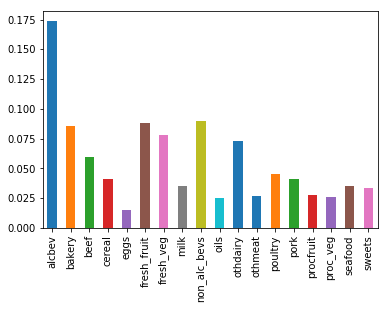

In [700]:
means_no = cali_no[expenditures].describe()
means_no = means_no.loc['mean'].to_frame()
means_no['ratio'] = means_no['mean']/sum(means_no['mean'])

x1 = means_no['ratio'].plot.bar()

means_no

,mean,ratio
alcbev,4.842387,0.056493
bakery,7.906218,0.092236
beef,5.851106,0.068261
cereal,4.092479,0.047744
eggs,1.075230,0.012544
fresh_fruit,8.107099,0.094580
fresh_veg,6.532807,0.076214
milk,3.284924,0.038323
non_alc_bevs,9.937705,0.115936
oils,2.429568,0.028344


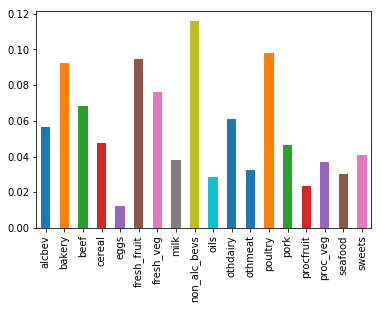

In [701]:
means_yes = cali_yes[expenditures].describe()
means_yes = means_yes.loc['mean'].to_frame()
means_yes['ratio'] = means_yes['mean']/sum(means_yes['mean'])
means_yes['ratio'].plot.bar()
means_yes

# Estimating demand for CA residents

### Loading variables

In [826]:
X_yes = cali_yes[expenditures]
Z_yes = cali_yes[household_chars]
Y_yes = np.log(X_yes.replace(0,np.nan))
P = test

Z_yes.head()

,,,age,M,log_fsize,vehicle,child_age
j,t,m,,,,,
361586,17,1,49,0,0.693147,1.0,5
361731,17,1,70,1,0.693147,2.0,0
362307,17,1,44,0,1.386294,1.0,4
362323,17,1,45,0,1.098612,NaN,0
362559,17,1,30,0,1.386294,2.0,2


In [720]:
Y_yes.head()

,,,alcbev,bakery,beef,cereal,eggs,fresh_fruit,fresh_veg,milk,non_alc_bevs,oils,othdairy,othmeat,poultry,pork,procfruit,proc_veg,seafood,sweets
j,t,m,,,,,,,,,,,,,,,,,,
361586,17,1,-0.216913,2.283028,1.490654,0.965081,0.737164,0.890329,1.510025,2.004269,2.021548,1.190888,2.317986,NaN,NaN,1.606433,1.339585,0.430184,NaN,1.755268
361731,17,1,2.387845,1.820509,2.560323,0.476234,NaN,2.458734,-0.127833,NaN,NaN,0.685619,1.920592,0.398776,1.772407,1.027832,NaN,1.519513,1.262713,2.035359
362307,17,1,NaN,2.788093,1.554982,1.905832,NaN,NaN,0.239017,0.806476,3.307985,1.789256,2.299581,0.690644,NaN,NaN,NaN,1.095273,NaN,2.419034
362323,17,1,NaN,2.375836,NaN,1.247032,0.371564,-0.703198,-0.703198,NaN,1.747459,0.559616,NaN,NaN,2.909084,1.381282,0.552303,1.075941,1.928619,NaN
362559,17,1,NaN,NaN,2.751120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.467839,NaN,NaN,NaN,NaN,NaN,NaN


In [827]:
P

<xarray.DataArray 'prices' (i: 18)>
array([9.937705, 7.906218, 5.851106, 4.092479, 1.07523 , 8.107099, 6.532807,
       3.284924, 4.48    , 2.429568, 5.214702, 2.803513, 3.975505, 8.39843 ,
       3.149823, 2.028527, 2.594154, 3.492714])
Coordinates:
  * i        (i) object 'alcbev' 'bakery' 'beef' ... 'seafood' 'sweets'

## Run Result(), get reduced form, and get betas

### Sanity check on estimation accuracy

In [828]:
result = cfe.Result(y = Y_no, z = Z_no, prices = P)
result.get_reduced_form()
result.delta.to_dataframe().unstack('k')
result.a.to_dataframe().unstack('i')
result.get_beta().to_dataframe()

,beta
i,
alcbev,0.356074
bakery,0.573952
beef,0.278181
cereal,0.490583
eggs,0.344141
fresh_fruit,0.672120
fresh_veg,0.665859
milk,0.396441
non_alc_bevs,0.626615


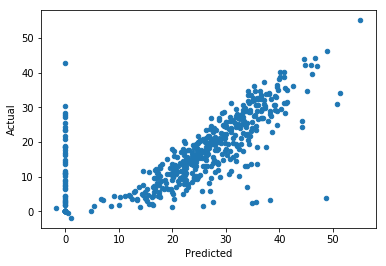

In [829]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

result.get_predicted_log_expenditures()

x = result.y.sum('i').to_dataframe().squeeze()
xhat = result.yhat.sum('i').to_dataframe().squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':x,'Predicted':xhat})

df.plot.scatter(x='Predicted',y='Actual')

### Sanity check on engels' curve

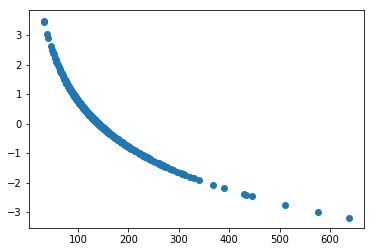

In [830]:
import pylab as pl 

# Turn off variation in household composition
result['z'] = result['z']*0

# select years and markets you want
l0 = result.loglambdas.sel(t=17,m=1)

# Predicted total expenditures given lambda & prices
x0 = result.get_predicted_expenditures().sum('i').sel(t=17,m=1)

pl.scatter(x0,l0)
pl.show()

### Calculates alphas and betas

In [831]:
result.get_alpha(as_df=True), result.get_beta(as_df=True)

(i
 alcbev          2.731445
 bakery          1.222553
 beef            1.340057
 cereal          1.073745
 eggs            0.851550
 fresh_fruit     1.342131
 fresh_veg       1.361302
 milk            0.868345
 non_alc_bevs    1.232566
 oils            1.029618
 othdairy        1.036096
 othmeat         0.960911
 pork            1.306786
 poultry         1.620314
 proc_veg        0.724839
 procfruit       1.130992
 seafood         1.365835
 sweets          0.868762
 Name: alpha, dtype: float64, i
 alcbev          0.356074
 bakery          0.573952
 beef            0.278181
 cereal          0.490583
 eggs            0.344141
 fresh_fruit     0.672120
 fresh_veg       0.665859
 milk            0.396441
 non_alc_bevs    0.626615
 oils            0.326054
 othdairy        0.556001
 othmeat         0.477165
 pork            0.250841
 poultry         0.282382
 proc_veg        0.533137
 procfruit       0.483438
 seafood         0.331654
 sweets          0.538605
 Name: beta, dtype: float64)

In [832]:
result.delta.to_dataframe().unstack('k')

delta                                        
k                    M       age child_age log_fsize   vehicle
i                                                             
alcbev        0.150227 -0.002177 -0.076943  0.142174  0.097789
bakery       -0.051377  0.005167 -0.005118  0.392855  0.049719
beef          0.191381  0.005322  0.018020  0.146062  0.071556
cereal       -0.042215 -0.001311 -0.012482  0.390245  0.034395
eggs         -0.042799 -0.003708  0.017175 -0.027634  0.063671
fresh_fruit  -0.055631  0.001553 -0.030673  0.598944 -0.006918
fresh_veg    -0.008470  0.000526  0.000931  0.339908  0.037456
milk          0.060387  0.001077  0.015796  0.352377 -0.040757
non_alc_bevs  0.001281  0.006543 -0.012563  0.244919  0.072674
oils          0.128324 -0.001301 -0.003595  0.033174  0.082033
othdairy      0.025580  0.006533  0.024955  0.338769  0.047251
othmeat       0.112858  0.001720  0.003219  0.158281  0.045191
pork          0.045742 -0.002865  0.017353  0.259775  0.131887
poultry       0.045476 -0.003943  0.034675  0.090157  0.072560
proc_veg     -0.190037  0.002398 -0.041228  0.374619  0.002344
procfruit     0.213698 -0.003880  0.011932 -0.121069  0.083163
seafood      -0.093816  0.006666 -0.054161  0.339111 -0.026974
sweets       -0.005948  0.002622 -0.021817  0.129186  0.042497

## Estimate demand system for CA residents 



As mentioned above, we&rsquo;ve estimated the parameters of a Frischian
demand system (demands that depend on prices and the households
marginal utility of expenditures).  But we can *compute* the
corresponding Marshallian (depends on prices and budget) or Hicksian
(depends on prices and the level of utility) demands for this same
population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$
and prices.  We&rsquo;ll use the earliest prices, from 1975, and focus on
village A as the market we&rsquo;re interested in



In [833]:
result

<xarray.Result>
Dimensions:           (i: 18, j: 485, k: 5, kp: 5, m: 1, t: 1)
Coordinates:
  * k                 (k) object 'age' 'M' 'log_fsize' 'vehicle' 'child_age'
  * m                 (m) int64 1
  * t                 (t) int64 17
  * i                 (i) object 'alcbev' 'bakery' 'beef' ... 'seafood' 'sweets'
  * j                 (j) int64 360993 360998 361099 ... 383852 383894 383928
  * kp                (kp) <U9 'M' 'age' 'child_age' 'log_fsize' 'vehicle'
Data variables:
    alpha             (i) float64 2.731 1.223 1.34 1.074 ... 1.131 1.366 0.8688
    beta              (i) float64 0.3561 0.574 0.2782 ... 0.4834 0.3317 0.5386
    delta             (k, i) float64 -0.002177 0.005167 ... -0.05416 -0.02182
    prices            (i) float64 9.938 7.906 5.851 4.092 ... 2.029 2.594 3.493
    characteristics   (k, j, t, m) float64 62.0 45.0 60.0 71.0 ... 0.0 0.0 7.0
    loglambdas        (j, t, m) float64 -1.181 3.486 nan ... 1.778 nan 1.462
    a                 (i, t, m) float64

### Get prices 

In [834]:
p = result.prices.copy()

p.to_dataframe().squeeze()

i
alcbev          9.937705
bakery          7.906218
beef            5.851106
cereal          4.092479
eggs            1.075230
fresh_fruit     8.107099
fresh_veg       6.532807
milk            3.284924
non_alc_bevs    4.480000
oils            2.429568
othdairy        5.214702
othmeat         2.803513
pork            3.975505
poultry         8.398430
proc_veg        3.149823
procfruit       2.028527
seafood         2.594154
sweets          3.492714
Name: prices, dtype: float64

### Calculate quantities demanded

In [835]:
x = 50 # Budget

def get_demand(x, p):
    demand = result_no.demands(x,p) 
    demand = demand.to_frame()
    demand.index.rename('food_group', inplace = True)
    return demand

get_demand(x, p)

,quantities
food_group,
alcbev,0.849918
bakery,0.369024
beef,0.692986
cereal,0.547690
eggs,0.961931
fresh_fruit,0.331577
fresh_veg,0.391768
milk,0.618287
non_alc_bevs,0.483765


# Indifference Curves for various food groups

In [836]:
def plot_curve(group):
    def my_prices_beef(p0,p=p):
        p.loc[group] = p0
        return p

    for x in [10,20,40,80,160]:
        try:
            plt.plot([result_no.demands(x,my_prices(p0))[group] for p0 in P],P)
        except OverflowError:
            break

    plt.xlabel(group)
    plt.ylabel('Price')

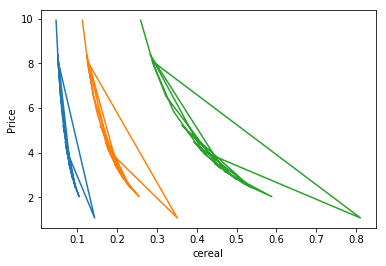

In [837]:
plot_curve('cereal')

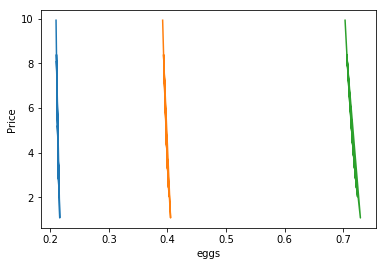

In [838]:
plot_curve('eggs')

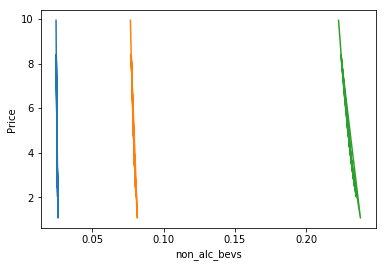

In [839]:
plot_curve('non_alc_bevs')

## Considering nutritional information

In [840]:
fct = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS_Pbtl-M-jP17QyYQzwsy5hzJNC1RS2ol_JmH11G6Omw3MX6SesnK3_6puwsWQUHFsKCVhPFCwhExE/pub?gid=499724967&single=true&output=csv')
fct.rename(index = str, columns= {'Unnamed: 0': 'Nutrient'}, inplace = True)
fct.set_index('Nutrient', drop = True, inplace = True)
fct.shape

(18, 33)

In [766]:
fct.head()

,Caffeine,"Calcium, Ca","Carbohydrate, by difference",Cholesterol,Energy,"Fatty acids, total monounsaturated","Fatty acids, total polyunsaturated","Fatty acids, total saturated","Fatty acids, total trans","Fiber, total dietary","Folate, DFE","Iron, Fe","Magnesium, Mg",Niacin,"Phosphorus, P","Potassium, K",Protein,Riboflavin,"Sodium, Na","Sugars, total",Thiamin,Total lipid (fat),"Vitamin A, IU","Vitamin A, RAE",Vitamin B-12,Vitamin B-6,"Vitamin C, total ascorbic acid",Vitamin D,Vitamin D (D2 + D3),Vitamin E (alpha-tocopherol),Vitamin K (phylloquinone),Water,"Zinc, Zn"
Nutrient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
alcbev,0,5.666667,2.256667,0.000000,54.666667,0.000000,0.000000,0.000000,0.00,0.000000,1.666667,0.076667,7.333333,0.163333,14.666667,41.666667,0.356667,0.018333,3.666667,1.266667,0.016667,0.000000,0.000000,0.000000,0.003333,0.024667,0.000000,0.000000,0.000000,0.000000,0.000000,91.223333,0.063333
bakery,0,8.666667,53.926667,0.000000,373.000000,2.950000,0.386667,4.680000,0.00,3.466667,0.000000,2.873333,28.000000,2.502667,90.000000,114.666667,6.216667,0.158667,516.666667,18.100000,0.000000,15.340000,0.000000,0.000000,0.000000,0.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.776667
beef,0,4.333333,1.190000,63.666667,220.000000,0.000000,0.000000,5.916667,0.44,0.000000,0.000000,2.470000,0.000000,0.000000,0.000000,0.000000,18.460000,0.000000,218.666667,0.000000,0.000000,15.166667,119.000000,0.000000,0.000000,0.000000,1.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cereal,0,39.000000,70.643333,0.000000,402.333333,2.136667,0.820000,4.360000,0.03,4.633333,209.000000,5.130000,5.333333,6.173333,23.666667,24.000000,9.076667,0.523333,971.666667,18.023333,0.463333,10.960000,1316.666667,277.666667,1.853333,0.616667,7.400000,98.666667,2.466667,0.043333,0.433333,1.000000,1.853333
eggs,0,100.000000,13.766667,169.666667,166.000000,0.000000,0.000000,2.270000,0.00,1.466667,0.000000,1.263333,0.000000,0.000000,0.000000,50.666667,10.520000,0.000000,347.666667,3.263333,0.000000,7.500000,743.333333,0.000000,0.000000,0.000000,3.266667,26.666667,0.000000,0.000000,0.000000,0.000000,0.000000


### Plot nutritional outcomes

In [841]:
# The @ operator means matrix multiply

important = ['Sodium, Na', 'Energy', 'Cholesterol', 'Sugars, total', 'Protein', 'Iron, Fe', 'Vitamin D (D2 + D3)']
imp_values = pd.DataFrame()

N = fct0.T@c0
for n in important:
    imp_values = imp_values.append(N.loc[n])

imp_values

,quantities
"Sodium, Na",8589.798285
Energy,4635.167486
Cholesterol,607.676941
"Sugars, total",195.723951
Protein,145.413217
"Iron, Fe",35.276376
Vitamin D (D2 + D3),12.813823


Text(0, 0.5, 'log nutrient')

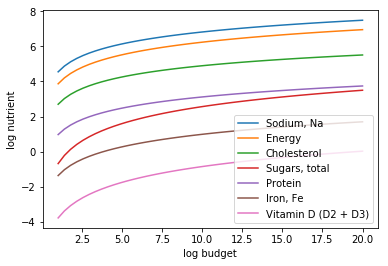

In [842]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(1,20,50)

plt.plot(X,pd.concat({x:np.log(nutrient_demand(x,p))[important] for x in X},axis=1).T)
plt.legend(important)
plt.xlabel('log budget')
plt.ylabel('log nutrient')

In [843]:
cfe.Result?